In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file_path="eg3.csv"
tips=pd.read_csv(file_path)
print(tips.head())

   house size  price
0        1000    150
1        1200    180
2        1500    220
3        1800    240
4        2000    260


In [3]:
X=tips["house size"].values
y=tips["price"].values
def locally_weighted_regression(x_query,X,y,tau):
    m=len(X)
    weights=np.exp(-((X-x_query)**2)/(2*tau**2))
    X_b=np.c_[np.ones(m),X]
    W=np.diag(weights)
    theta=np.linalg.pinv(X_b.T@W@X_b)@(X_b.T@W@y)
    x_query_b=np.array([1,x_query])
    return x_query_b@theta
tau=200
x_query=1600
predicted_tip=locally_weighted_regression(x_query,X,y,tau)
print(f"predicted tip for total bill of $30: {predicted_tip:2f}")

predicted tip for total bill of $30: 225.097031


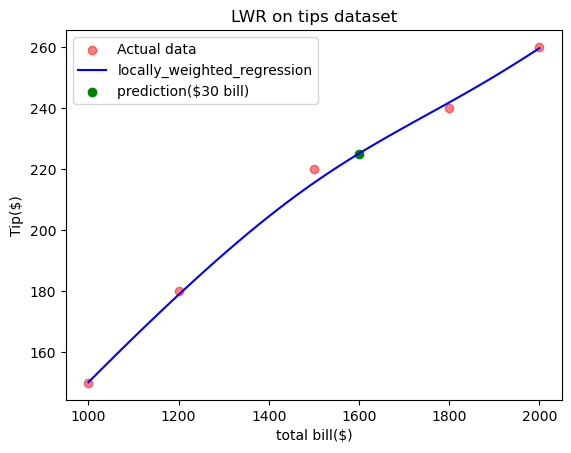

In [4]:
X_range=np.linspace(X.min(),X.max(),100)
y_pred=np.array([locally_weighted_regression(x,X,y,tau) for x in X_range])
plt.scatter(X,y,color='red', alpha=0.5,label="Actual data")
plt.plot(X_range, y_pred, color='blue',label="locally_weighted_regression")
plt.scatter([x_query],[predicted_tip], color='green', marker='o', label="prediction($30 bill)")
plt.xlabel("total bill($)")
plt.ylabel("Tip($)")
plt.legend()
plt.title("LWR on tips dataset")
plt.show()

In [5]:
X=tips["house size"].values
y=tips["price"].values
def locally_weighted_regression(x_query,X,y,tau):
    m=len(X)
    weights=np.exp(-((X-x_query)**2)/(2*tau**2))
    X_b=np.c_[np.ones(m),X]
    W=np.diag(weights)
    theta=np.linalg.pinv(X_b.T@W@X_b)@(X_b.T@W@y)
    x_query_b=np.array([1,x_query])
    return x_query_b@theta
tau=300
x_query=1600
predicted_tip=locally_weighted_regression(x_query,X,y,tau)
print(f"predicted tip for total bill of $30: {predicted_tip:2f}")

predicted tip for total bill of $30: 222.995314


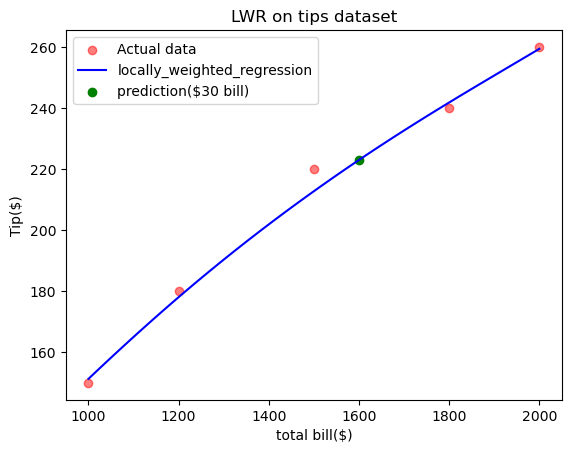

In [6]:
X_range=np.linspace(X.min(),X.max(),100)
y_pred=np.array([locally_weighted_regression(x,X,y,tau) for x in X_range])
plt.scatter(X,y,color='red', alpha=0.5,label="Actual data")
plt.plot(X_range, y_pred, color='blue',label="locally_weighted_regression")
plt.scatter([x_query],[predicted_tip], color='green', marker='o', label="prediction($30 bill)")
plt.xlabel("total bill($)")
plt.ylabel("Tip($)")
plt.legend()
plt.title("LWR on tips dataset")
plt.show()